In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [12]:
# Inspecting songs from 2000 to 2023
# /!\ this dataset is missin loudness and tempo
top_100_songs = pd.read_csv('../../raw_data/spotify2000-2023_enriched_with_countries.csv', sep=';')

# Data Shape
print(top_100_songs.shape)

# Data head
top_100_songs.head()

(2385, 15)


,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity,country
0,Flowers,Miley Cyrus,pop,2023.0,118.0,68.0,71.0,-4.0,3.0,65.0,200.0,6.0,7.0,98.0,US
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023.0,120.0,59.0,78.0,-8.0,35.0,73.0,174.0,44.0,3.0,97.0,KR
2,BESO,ROSALÍA,pop,2023.0,95.0,64.0,77.0,-7.0,17.0,53.0,195.0,74.0,14.0,96.0,ES
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023.0,133.0,81.0,70.0,-8.0,25.0,86.0,131.0,25.0,5.0,96.0,UNKNOWN
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022.0,98.0,62.0,72.0,-6.0,8.0,17.0,222.0,42.0,5.0,96.0,US


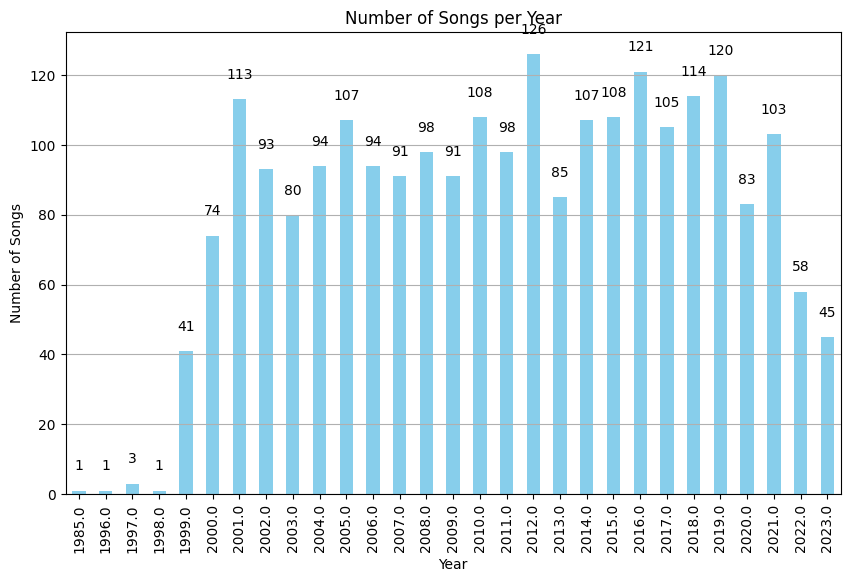

In [13]:
# plot number of songs per year with annotations
def plot_songs_per_year(df):
    songs_per_year = df['year'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    ax = songs_per_year.plot(kind='bar', color='skyblue')
    plt.title('Number of Songs per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Songs')
    plt.grid(axis='y')
    
    # Add annotations on top of each bar
    for i, value in enumerate(songs_per_year):
        ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)
    
    plt.show()

plot_songs_per_year(top_100_songs)

In [14]:
# keep only the songs from years 2000 to 2022
top_100_songs = top_100_songs[(top_100_songs['year'] >= 2000) & (top_100_songs['year'] <= 2022)]
top_100_songs.reset_index(drop=True, inplace=True)

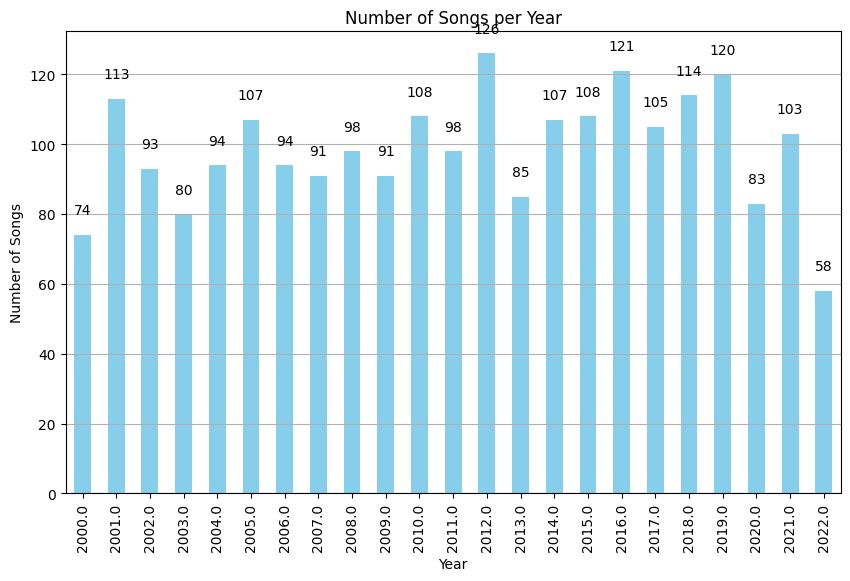

In [15]:
plot_songs_per_year(top_100_songs)

In [16]:
# i want to sort the df by year and then by popularity descending
def sort_songs_by_year_and_popularity(df):
    sorted_df = df.sort_values(by=['year', 'popularity'], ascending=[True, False])
    sorted_df.reset_index(drop=True, inplace=True)
    return sorted_df

sorted_top_100_songs = sort_songs_by_year_and_popularity(top_100_songs)
sorted_top_100_songs.head(20)

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity,country
0,Yellow,Coldplay,permanent wave,2000.0,173.0,66.0,43.0,-7.0,23.0,28.0,267.0,0.0,3.0,90.0,GB
1,The Real Slim Shady,Eminem,detroit hip hop,2000.0,105.0,66.0,95.0,-4.0,5.0,76.0,284.0,3.0,6.0,89.0,US
2,In the End,Linkin Park,alternative metal,2000.0,105.0,86.0,56.0,-6.0,21.0,40.0,217.0,1.0,6.0,87.0,US
3,Stan,Eminem,detroit hip hop,2000.0,80.0,77.0,78.0,-4.0,52.0,51.0,404.0,4.0,24.0,85.0,US
4,Ms. Jackson,Outkast,atl hip hop,2000.0,95.0,81.0,84.0,-6.0,8.0,61.0,271.0,14.0,27.0,83.0,US
5,It's My Life,Bon Jovi,glam metal,2000.0,120.0,91.0,55.0,-4.0,35.0,54.0,224.0,3.0,5.0,82.0,US
6,Kryptonite,3 Doors Down,alternative metal,2000.0,99.0,87.0,55.0,-6.0,17.0,54.0,234.0,1.0,3.0,81.0,US
7,It Wasn't Me,Shaggy,dance pop,2000.0,95.0,61.0,85.0,-5.0,31.0,65.0,228.0,6.0,7.0,80.0,JM
8,Oops!...I Did It Again,Britney Spears,dance pop,2000.0,95.0,83.0,75.0,-5.0,36.0,89.0,211.0,30.0,4.0,80.0,US
9,Dancing in the Moonlight,Toploader,british alternative rock,2000.0,119.0,86.0,63.0,-3.0,35.0,87.0,233.0,6.0,3.0,79.0,GB


In [17]:
# take the top 50 songs for each year based on the highest popularity
def get_top_n_songs_per_year(df, n=50):
    top_n_songs = df.groupby('year').head(n)
    top_n_songs.reset_index(drop=True, inplace=True)
    return top_n_songs

final_top_50_songs = get_top_n_songs_per_year(sorted_top_100_songs, n=50)
final_top_50_songs.head(20)


,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity,country
0,Yellow,Coldplay,permanent wave,2000.0,173.0,66.0,43.0,-7.0,23.0,28.0,267.0,0.0,3.0,90.0,GB
1,The Real Slim Shady,Eminem,detroit hip hop,2000.0,105.0,66.0,95.0,-4.0,5.0,76.0,284.0,3.0,6.0,89.0,US
2,In the End,Linkin Park,alternative metal,2000.0,105.0,86.0,56.0,-6.0,21.0,40.0,217.0,1.0,6.0,87.0,US
3,Stan,Eminem,detroit hip hop,2000.0,80.0,77.0,78.0,-4.0,52.0,51.0,404.0,4.0,24.0,85.0,US
4,Ms. Jackson,Outkast,atl hip hop,2000.0,95.0,81.0,84.0,-6.0,8.0,61.0,271.0,14.0,27.0,83.0,US
5,It's My Life,Bon Jovi,glam metal,2000.0,120.0,91.0,55.0,-4.0,35.0,54.0,224.0,3.0,5.0,82.0,US
6,Kryptonite,3 Doors Down,alternative metal,2000.0,99.0,87.0,55.0,-6.0,17.0,54.0,234.0,1.0,3.0,81.0,US
7,It Wasn't Me,Shaggy,dance pop,2000.0,95.0,61.0,85.0,-5.0,31.0,65.0,228.0,6.0,7.0,80.0,JM
8,Oops!...I Did It Again,Britney Spears,dance pop,2000.0,95.0,83.0,75.0,-5.0,36.0,89.0,211.0,30.0,4.0,80.0,US
9,Dancing in the Moonlight,Toploader,british alternative rock,2000.0,119.0,86.0,63.0,-3.0,35.0,87.0,233.0,6.0,3.0,79.0,GB


In [18]:
final_top_50_songs.shape

(1150, 15)

In [19]:
# check for missing data
final_top_50_songs.isnull().sum()

title            0
artist           0
top genre        0
year             0
bpm              0
energy           0
danceability     0
dB               0
liveness         0
valence          0
duration         0
acousticness     0
speechiness      0
popularity       0
country          0
dtype: int64

In [20]:
# save to csv in data folder
os.makedirs('data', exist_ok=True)
final_top_50_songs.to_csv('data/top_50_from_2000_to_2023.csv', index=False)